In [1]:
pip install pandas matplotlib tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
df = pd.read_csv(r'C:\Users\suhas\Downloads\archive (1)\test.csv',encoding= 'unicode_escape')
df.text=df.text.astype(str)
df.head          

<bound method NDFrame.head of           textID                                               text sentiment  \
0     f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1     96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2     eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3     01082688c6                                        happy bday!  positive   
4     33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   
...          ...                                                ...       ...   
4810         NaN                                                nan       NaN   
4811         NaN                                                nan       NaN   
4812         NaN                                                nan       NaN   
4813         NaN                                                nan       NaN   
4814         NaN                                                nan       NaN  

In [3]:
review_df = df[['text','sentiment']]
print(review_df.shape)
review_df.head(5)

(4815, 2)


,text,sentiment
0,Last session of the day http://twitpic.com/67ezh,neutral
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive


In [4]:
df.columns

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')

In [5]:
review_df = review_df[review_df['sentiment']!= "neutral"]

print(review_df.shape)
review_df.head(5)

(3385, 2)


,text,sentiment
1,Shanghai is also really exciting (precisely -...,positive
2,"Recession hit Veronique Branquinho, she has to...",negative
3,happy bday!,positive
4,http://twitpic.com/4w75p - I like it!!,positive
5,that`s great!! weee!! visitors!,positive


In [6]:
review_df['sentiment'].value_counts()

positive    1103
negative    1001
Name: sentiment, dtype: int64

In [7]:
sentiment_label = review_df.sentiment.factorize()
sentiment_label

(array([ 0,  1,  0, ..., -1, -1, -1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [8]:
tweet = review_df.text.values

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 2000)

tokenizer.fit_on_texts(tweet)

In [10]:
encoded_docs = tokenizer.texts_to_sequences(tweet)

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

vocab_size =   45015
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           1440480   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 1,457,131
Trainable params: 1,457,131
Non-trainable params: 0
______________________________________________

In [13]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.5, epochs=5, batch_size=32)


Epoch 1/5
53/53 [==============================] - 25s 419ms/step - loss: 0.6904 - accuracy: 0.5207 - val_loss: 0.5356 - val_accuracy: 0.1270
Epoch 2/5
53/53 [==============================] - 18s 341ms/step - loss: 0.6440 - accuracy: 0.6773 - val_loss: 0.7580 - val_accuracy: 0.1931
Epoch 3/5
53/53 [==============================] - 15s 276ms/step - loss: 0.4730 - accuracy: 0.7855 - val_loss: 0.7077 - val_accuracy: 0.1979
Epoch 4/5
53/53 [==============================] - 17s 320ms/step - loss: 0.3378 - accuracy: 0.8729 - val_loss: 0.7422 - val_accuracy: 0.2026
Epoch 5/5
53/53 [==============================] - 25s 475ms/step - loss: 0.2595 - accuracy: 0.8966 - val_loss: 1.4188 - val_accuracy: 0.2020


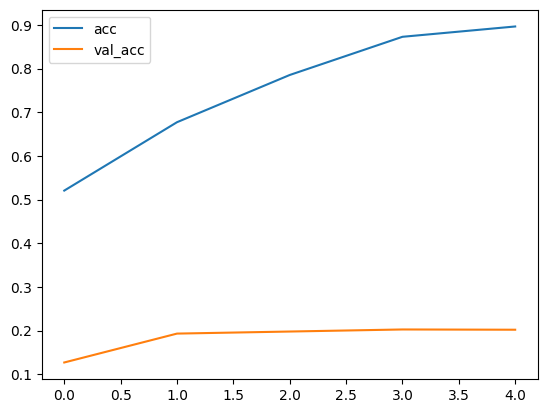

<Figure size 640x480 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

plt.savefig("plot.jpg")

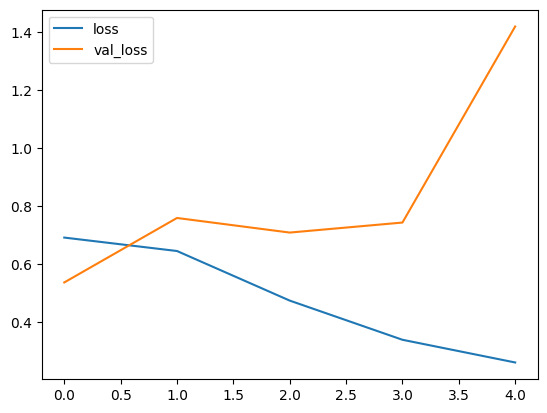

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [16]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label:",sentiment_label[1][prediction])
    
test_sentence1 = "I`m sorry  at least it`s Friday?"
predict_sentiment(test_sentence1)

test_sentence2 = "You seem nice, you`re generous and you know your stuff"
predict_sentiment(test_sentence2)

1/1 [==============================] - 0s 231ms/step
Predicted label: negative
1/1 [==============================] - 0s 27ms/step
Predicted label: positive
